In [4]:
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import s3fs

from scipy.signal import savgol_filter

import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from IPython.display import Image, display

from shapely import wkt

In [5]:
import s3fs

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "anhlinh"
fs.ls(MY_BUCKET)

['anhlinh/diffusion']

In [6]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_dep.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_dep = pd.read_csv(file_in)

# Vérification
df_indicateurs_dep.head()

,Unnamed: 0,Date,Département,Indicateur,Nombre,Population,Géométrie,Taux (/10 000),Année,Mois
0,0,1996-01-01,01,Homicides,0.0,499310,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",0.000000,1996,1
1,1,1996-01-01,02,Homicides,1.0,538017,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",0.018587,1996,1
2,2,1996-01-01,03,Homicides,0.0,349376,"POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3...",0.000000,1996,1
3,3,1996-01-01,04,Homicides,0.0,137453,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...",0.000000,1996,1
4,4,1996-01-01,05,Homicides,0.0,118526,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...",0.000000,1996,1


In [4]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_nat.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_nat = pd.read_csv(file_in)

# Vérification
df_indicateurs_nat.head()

,Unnamed: 0,Date,Zone,Indicateur,Nombre,Population,Taux (/10 000),Année,Mois,Taux relatif,Saison
0,0,1996-01-01,France_Métro,Coups et blessures volontaires,5616.0,57936,0.969345,1996,1,1.000000,Hiver
1,1,1996-02-01,France_Métro,Coups et blessures volontaires,6115.0,57943,1.055347,1996,2,1.088722,Hiver
2,2,1996-03-01,France_Métro,Coups et blessures volontaires,6668.0,57951,1.150627,1996,3,1.187015,Printemps
3,3,1996-04-01,France_Métro,Coups et blessures volontaires,6800.0,57963,1.173162,1996,4,1.210262,Printemps
4,4,1996-05-01,France_Métro,Coups et blessures volontaires,7415.0,57976,1.278978,1996,5,1.319424,Printemps


In [5]:
df_indicateurs_dep.dtypes


Unnamed: 0          int64
Date               object
Département        object
Indicateur         object
Nombre            float64
Population          int64
Géométrie          object
Taux (/10 000)    float64
Année               int64
Mois                int64
dtype: object

In [6]:
from visualisation import tracer_evolution_taux
from visualisation import charte_graphique
from visualisation import boxplot_indicateur_par_saison
from visualisation import tracer_evolution_taux_relatif_lisse

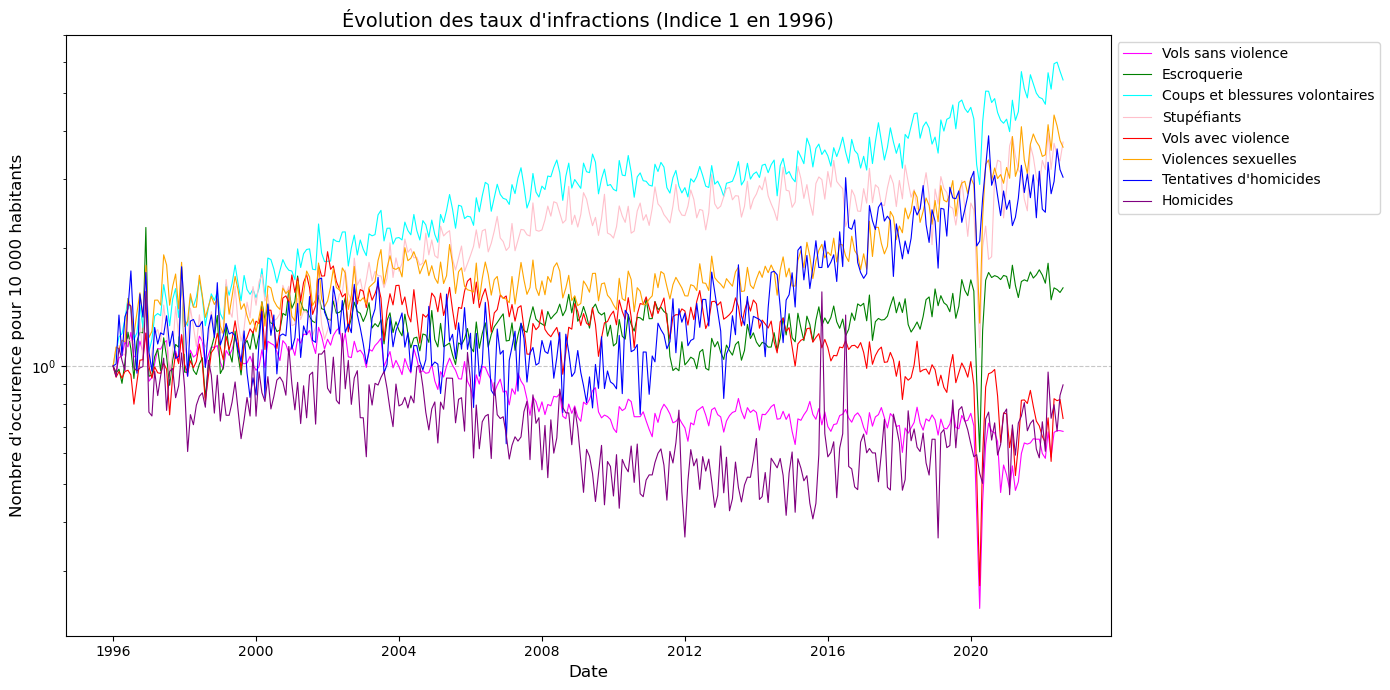

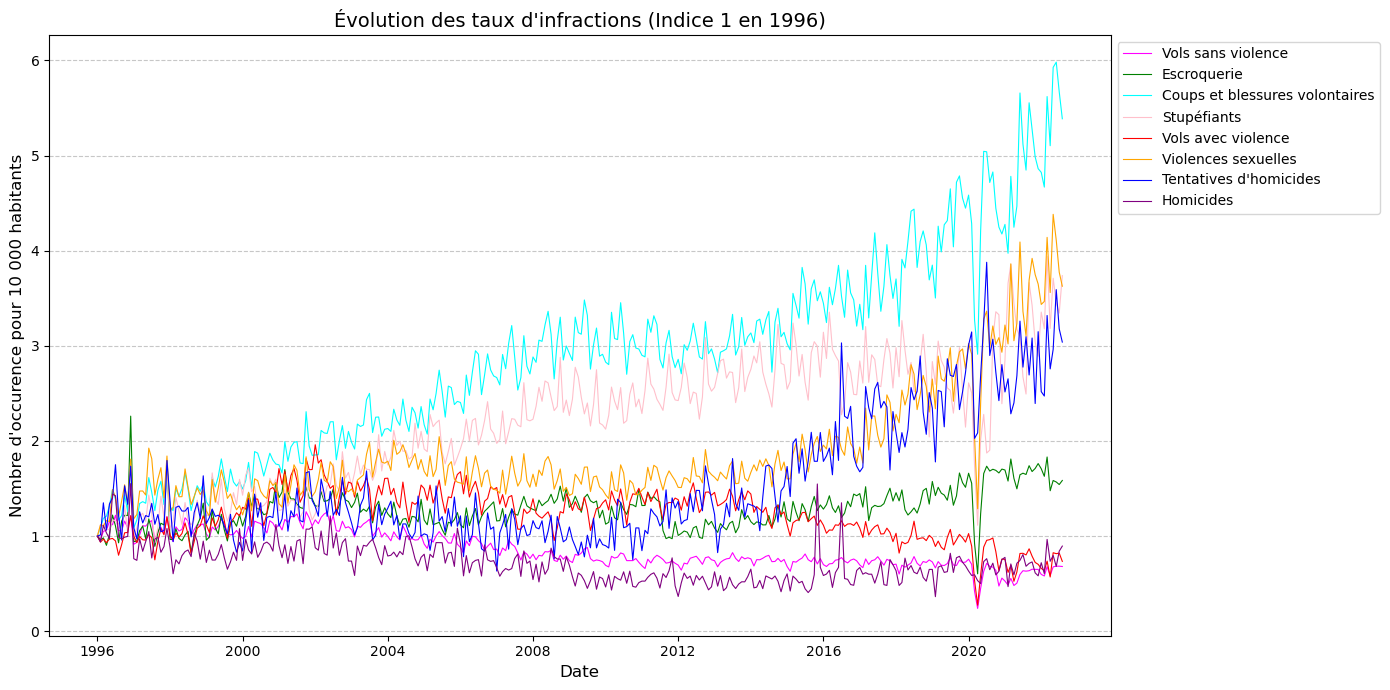

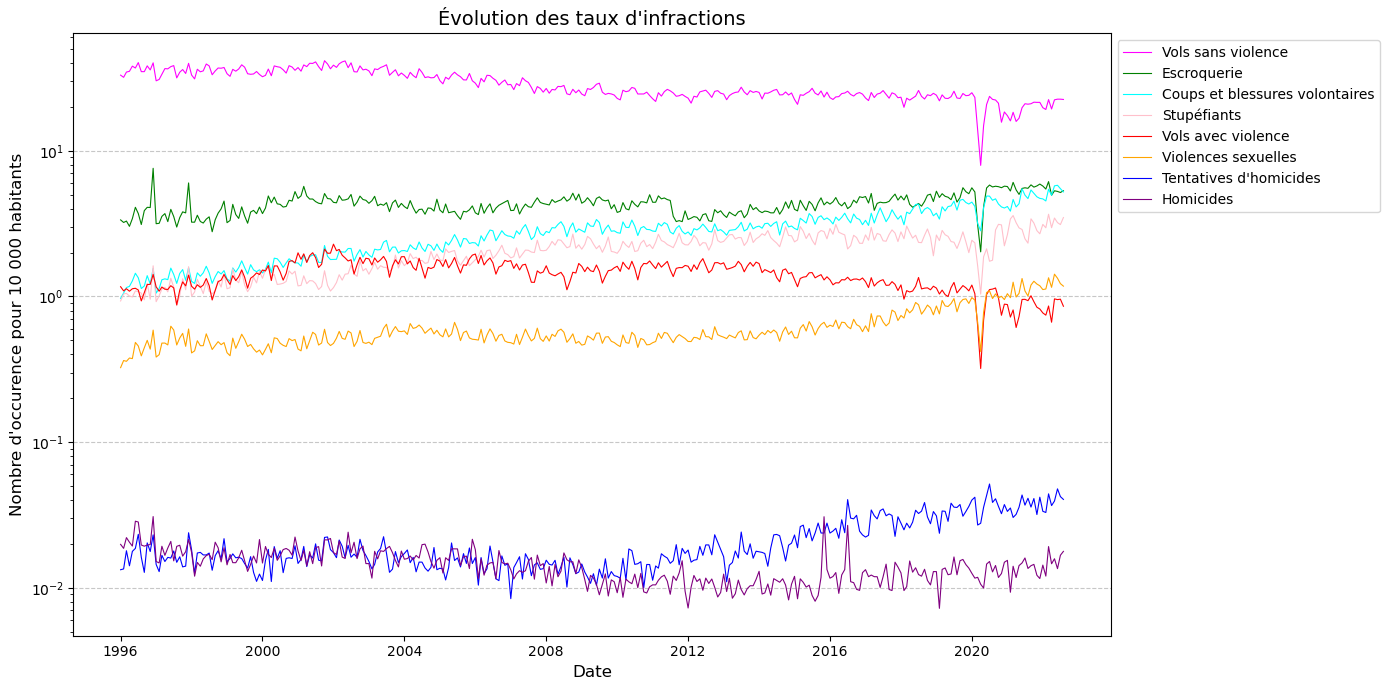

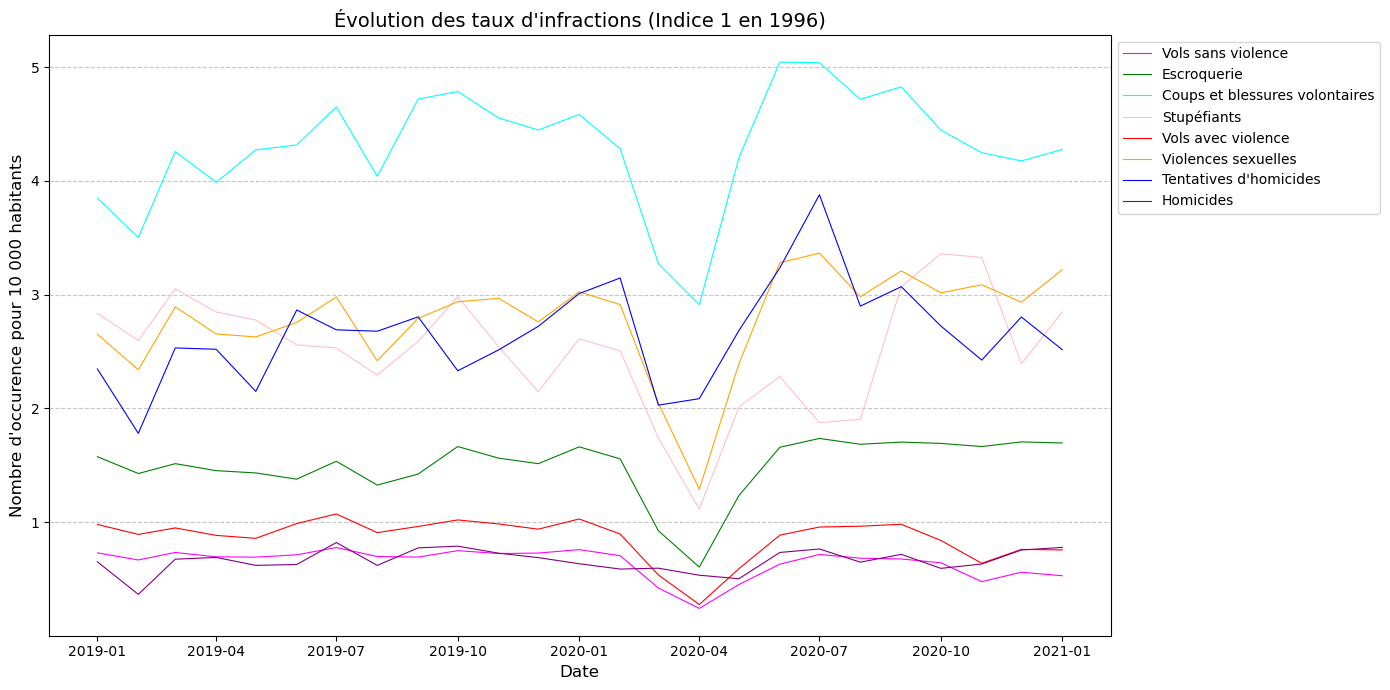

In [7]:
# Exemples d'utilisation
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Évolution des taux d'infractions (Indice 1 en 1996)", use_log_scale = True, time_period=[])
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Évolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True)
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Évolution des taux d'infractions (Indice 1 en 1996)", use_log_scale = False, smooth = False, time_period=["2019-01-01", "2021-01-01"])

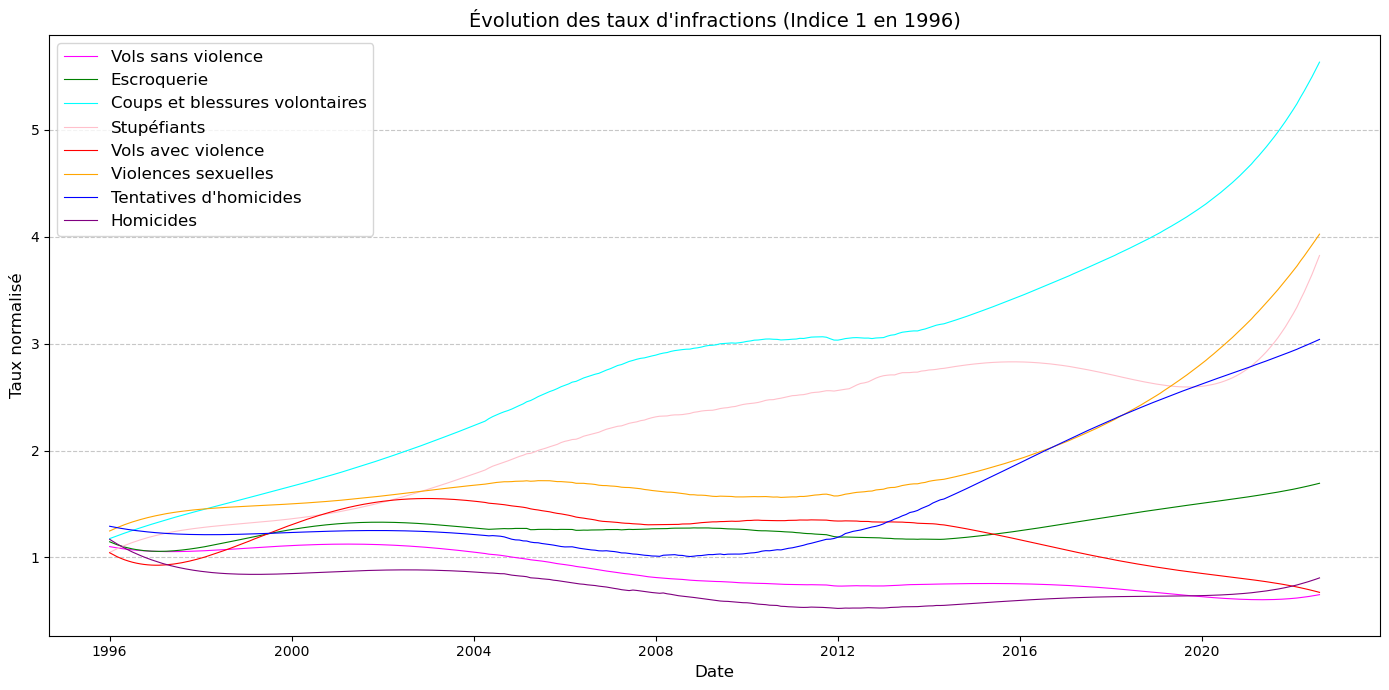

In [8]:
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique)

/home/onyxia/work/Python-pour-la-data-science-2A/data/visualisation.py:196: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Saison', y='Taux (/10 000)', data=df_indicateur_filtre,


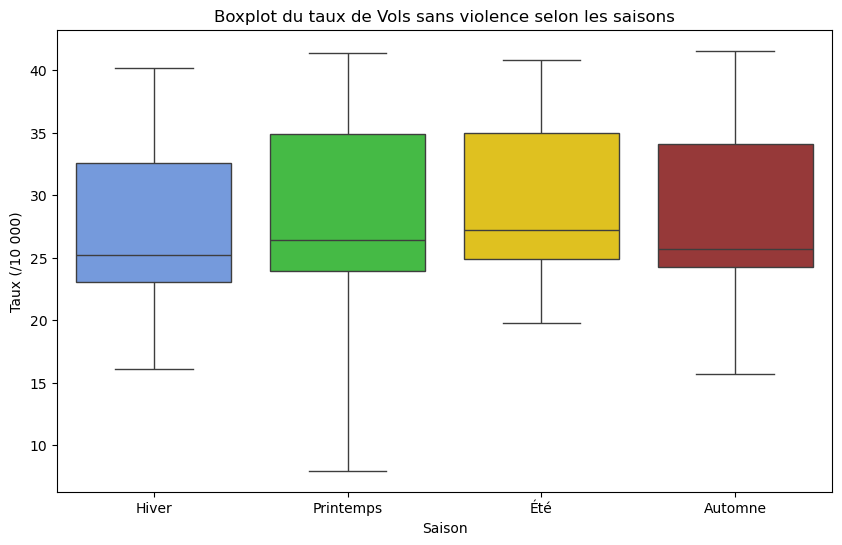

In [9]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence")

In [ ]:
from visualisation import évolution_indicateur
from visualisation import charte_graphique2

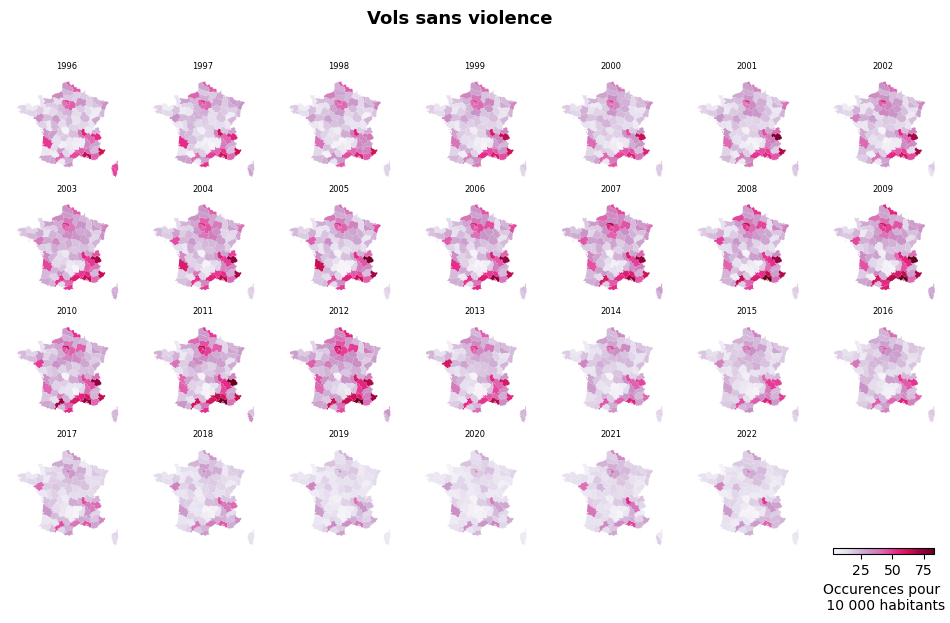

In [ ]:
évolution_indicateur(df_indicateurs_dep, "Vols sans violence")